# Phân tích dữ liệu Bồi thường Bảo hiểm trách nhiệm dân sự đối với bên thứ ba

## Thông tin về bộ dữ liệu:
  
Bảo hiểm trách nhiệm dân sự đối với bên thứ ba là một loại bảo hiểm bắt buộc dành cho chủ xe cơ giới tại Úc.  
Bảo hiểm bên thứ ba đây là sản phẩm bảo hiểm trách nhiệm pháp lý của Bên mua bảo hiểm đối với Bên thứ 3 phát sinh khi xảy ra tai nạn gây thiệt hại về người và tài sản.  
Bộ dữ liệu ausprivauto0405 được dựa trên số liệu về số hợp đồng bảo hiểm trách nhiệm dân sự đối với bên thứ ba dành cho xe cơ giới của một công ty bảo hiểm trong giai đoạn 2004 đến 2005.  
Tổng cộng có 67856 hợp đồng. 

## Định nghĩa các trường thông tin:

`1. `Exposure: Số năm hiệu lực của hợp đồng.\
`2. `VehValue: Giá trị của xe tính bằng nghìn AUD.\
`3. `VehAge: Nhóm tuổi của xe.\
`4. `VehBody: Loại thân xe.\
`5. `Gender: Giới tính của chủ xe.\
`6. `DrivAge: Nhóm tuổi của chủ xe.\
`7. `ClaimOcc: Thể hiện có yêu cầu bồi thường (hiển thị giá trị 1) hoặc không có yêu cầu bồi thường (hiển thị giá trị 0).\
`8. `ClaimNb: Số yêu cầu bồi thường.\
`9. `ClaimAmount: Tổng số tiền bồi thường.

## I. Phân tích chung về bộ dữ liệu
  
Bao gồm tải bộ dữ liệu, kiểm tra các giá trị bị thiếu và xem xét những đặc điểm tổng quan về bộ dữ liệu


In [1]:
#Import các thư viện cần thiết
import pandas as pd
import numpy as np
import seaborn as sns
import pyreadr
import matplotlib.pyplot as plt

In [2]:
#Tải bộ dữ liệu
ausprivauto0405 = pyreadr.read_r("ausprivauto0405.rda")
ausprivauto0405_data = pd.DataFrame(ausprivauto0405["ausprivauto0405"])

#Xem nhanh 5 dòng đầu tiên
ausprivauto0405_data.head(5)

,Exposure,VehValue,VehAge,VehBody,Gender,DrivAge,ClaimOcc,ClaimNb,ClaimAmount
0,0.303901,1.06,old cars,Hatchback,Female,young people,0,0,0.0
1,0.648871,1.03,young cars,Hatchback,Female,older work. people,0,0,0.0
2,0.569473,3.26,young cars,Utility,Female,young people,0,0,0.0
3,0.317591,4.14,young cars,Station wagon,Female,young people,0,0,0.0
4,0.648871,0.72,oldest cars,Hatchback,Female,young people,0,0,0.0


In [3]:
#Thông tin chung về bộ dữ liệu
ausprivauto0405_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67856 entries, 0 to 67855
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Exposure     67856 non-null  float64 
 1   VehValue     67856 non-null  float64 
 2   VehAge       67856 non-null  category
 3   VehBody      67856 non-null  category
 4   Gender       67856 non-null  category
 5   DrivAge      67856 non-null  category
 6   ClaimOcc     67856 non-null  int32   
 7   ClaimNb      67856 non-null  int32   
 8   ClaimAmount  67856 non-null  float64 
dtypes: category(4), float64(3), int32(2)
memory usage: 2.3 MB


#### Bộ dữ liệu gồm:
04 cột chứa dữ liệu phân loại là: "VehAge", "VehBody", "VehGender" và "DrivAge"  
04 cột chứa dữ liệu liên tục là: "Exposure", "VehValue", "ClaimOcc", "ClaimNb"  
01 cột chứa dữ liệu nhị phân là" "Claim Occ"  
  
Có thể thấy trong bộ dữ liệu không có giá trị nào bị thiếu.

### 1.1. Dữ liệu chung

In [4]:
#Thống kê chung của các cột
ausprivauto0405_data.describe(include='all')

,Exposure,VehValue,VehAge,VehBody,Gender,DrivAge,ClaimOcc,ClaimNb,ClaimAmount
count,67856.000000,67856.000000,67856,67856,67856,67856,67856.000000,67856.000000,67856.000000
unique,NaN,NaN,4,13,2,6,NaN,NaN,NaN
top,NaN,NaN,old cars,Sedan,Female,older work. people,NaN,NaN,NaN
freq,NaN,NaN,20064,22233,38603,16189,NaN,NaN,NaN
mean,0.468652,1.777021,NaN,NaN,NaN,NaN,0.068144,0.072757,137.270167
std,0.290025,1.205232,NaN,NaN,NaN,NaN,0.251995,0.278204,1056.297768
min,0.002738,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,0.219028,1.010000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,0.446270,1.500000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
75%,0.709103,2.150000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000


#### Có thể thấy:  
Giá trị xe cao nhất là 34560 AUD trong khi giá trị xe trung bình là 1777 AUD.  
Số yêu cầu bồi thường cao nhất của cùng một hợp đồng là 4.  
Thời gian hiệu lực hợp đồng trung bình là khoảng 0.4685 năm tương đương với khoảng 5 tháng 21 ngày.  

In [5]:
#Tổng quan các biến ở các cột chứa dữ liệu phân loại
non_numeric_columns = ('VehAge', 'VehBody', 'Gender', 'DrivAge')
for column in non_numeric_columns:
    print(f"{column}:{ausprivauto0405_data[column].unique().to_list()}")

VehAge:['old cars', 'young cars', 'oldest cars', 'youngest cars']
VehBody:['Hatchback', 'Utility', 'Station wagon', 'Hardtop', 'Panel van', 'Sedan', 'Truck', 'Coupe', 'Minibus', 'Motorized caravan', 'Bus', 'Convertible', 'Roadster']
Gender:['Female', 'Male']
DrivAge:['young people', 'older work. people', 'oldest people', 'working people', 'old people', 'youngest people']


Trong đó:  
`1. ` Cột "VehAge" bao gồm các giá trị: "oldest cars", "old cars", "young cars", "youngest cars"  
`2. ` Cột "Vehbody" bao gồm các giá trị: "Hatchback", "Utility", "Station wagon", "Hardtop", "Panel van", "Sedan", "Truck", "Coupe", "Minibus", "Motorized caravan", "Bus", "Convertible" và "Roadster"  
`3. ` Cột "Gender" bao gồm các giá trị: : "Female" và "Male"  
`4. ` Cột "DrivAge" bao gồm các giá trị: "youngest people", "young people", "working people", "older work. people", "old people" và "oldest people"


### 1.2. Các hợp đồng có xảy ra yêu cầu bồi thường

In [53]:
#Lọc các hợp đồng có xảy ra bồi thường
ausprivauto0405_data_claimocced = ausprivauto0405_data[ausprivauto0405_data['ClaimOcc']!=0]

#Thống kê chung của các cột 
ausprivauto0405_data_claimocced.describe(include="all")

,Exposure,VehValue,VehAge,VehBody,Gender,DrivAge,ClaimOcc,ClaimNb,ClaimAmount
count,4624.000000,4624.000000,4624,4624,4624,4624,4624.0,4624.000000,4624.000000
unique,NaN,NaN,4,13,2,6,NaN,NaN,NaN
top,NaN,NaN,old cars,Sedan,Female,working people,NaN,NaN,NaN
freq,NaN,NaN,1362,1476,2648,1113,NaN,NaN,NaN
mean,0.611271,1.859196,NaN,NaN,NaN,NaN,1.0,1.067690,2014.404075
std,0.261647,1.159595,NaN,NaN,NaN,NaN,0.0,0.271118,3548.906552
min,0.002738,0.000000,NaN,NaN,NaN,NaN,1.0,1.000000,200.000000
25%,0.410678,1.100000,NaN,NaN,NaN,NaN,1.0,1.000000,353.770000
50%,0.637919,1.570000,NaN,NaN,NaN,NaN,1.0,1.000000,761.564999
75%,0.832307,2.310000,NaN,NaN,NaN,NaN,1.0,1.000000,2091.424997


#### Có thể thấy

Số tiền bồi thường trung bình là 2014.4 AUD.  
Thời gian hiệu lực hợp đồng trung khi xảy ra yêu cầu bồi thường là 0.6112 năm tương đương với khoảng 7 tháng 13 ngày.  
Thời gian hiệu lực hợp đồng ngắn nhất khi xảy ra yêu cầu bồi thường là 0.0027 năm tương đương với khoảng 1 ngày.  
Số tiền bồi thường cao nhất là 55,922 AUD, còn số tiền bồi thường nhỏ nhất là 200 AUD.

In [57]:
#### Tìm yêu cầu bồi thường có số tiền bồi thường cao nhất
highest_claimamount = ausprivauto0405_data_claimocced['ClaimAmount'].max()
ausprivauto0405_data_claimocced[ausprivauto0405_data_claimocced['ClaimAmount'] == highest_claimamount]

,Exposure,VehValue,VehAge,VehBody,Gender,DrivAge,ClaimOcc,ClaimNb,ClaimAmount
28423,0.158795,4.8,young cars,Station wagon,Male,young people,1,1,55922.129883


#### Chi tiết hợp đồng có số tiền bồi thường cao nhất:  
`-` Thời gian hiệu lực của hợp đồng: 0.158795 tương đương với khoảng 1 tháng 28 ngày  
`-` Giá trị của xe: 4800 AUD    
`-` Loại xe: Station Wagon  
`-` Giới tính người lái: Nam  
`-` Nhóm tuổi của người lái: Trẻ ("young people")  
`-` Số tiền bồi thường: 55,922.129 AUD  

## II. Phân tích cụ thể
  
Bao gồm sự phân bổ của các giá trị và tìm hiểu mối quan hệ có thể có giữa chúng

### 2.1. Phân bổ của các giá trị


Tổng số hợp đồng = 67856 hợp đồng
Tổng số hợp đồng xảy ra bồi thường = 4624 hợp đồng
Tỉ lệ bồi thường = 6.81%


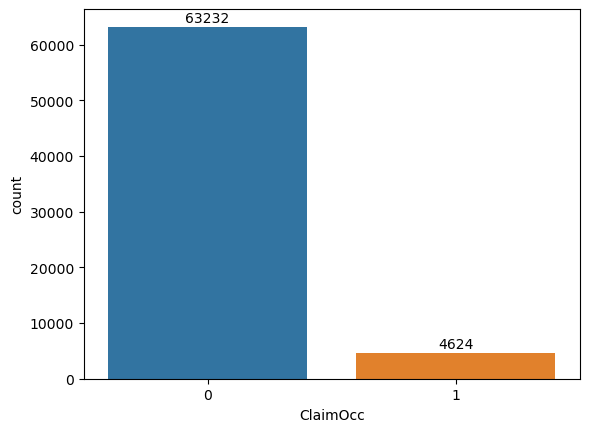

In [7]:
#Tính toán tỉ lệ bồi thường 
TotalPolicies = ausprivauto0405_data["ClaimOcc"].count()
ClaimOccPolicies = ausprivauto0405_data_claimocced["ClaimOcc"].sum()
ClaimRate = ClaimOccPolicies*100/TotalPolicies
print(f"Tổng số hợp đồng = {TotalPolicies} hợp đồng")
print(f"Tổng số hợp đồng xảy ra bồi thường = {ClaimOccPolicies} hợp đồng")
print(f"Tỉ lệ bồi thường = {round(ClaimRate,2)}%")

#Vẽ biểu đồ phân bổ của ClaimOcc
ClaimOcc_dist = sns.countplot(data=ausprivauto0405_data, x='ClaimOcc')
for i in ClaimOcc_dist.containers:
   ClaimOcc_dist.bar_label(i, padding=1.5)

Có thể thấy, trong 67856 hợp đồng có 4624 hợp đồng xảy ra yêu cầu bồi thường, tương ứng với tỉ lệ bồi thường xấp xỉ 6.81%.

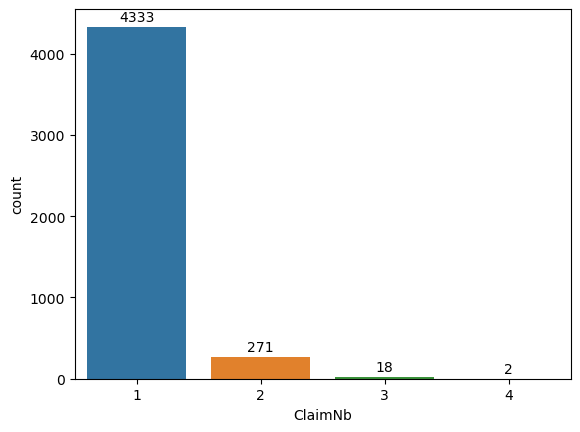

In [8]:
#Vẽ biểu đồ phân bổ của ClaimNb đối với các hợp đồng đã xảy ra bồi thường
ClaimNb_dist = sns.countplot(data=ausprivauto0405_data_claimocced, x='ClaimNb')
for i in ClaimNb_dist.containers:
   ClaimNb_dist.bar_label(i, padding=2)

Trong số 4624 hợp đồng có xảy ra bồi thường, phần lớn chỉ có 01 yêu cầu bồi thường, cá biệt có hai hợp đồng có đến 04 yêu cầu bồi thường.

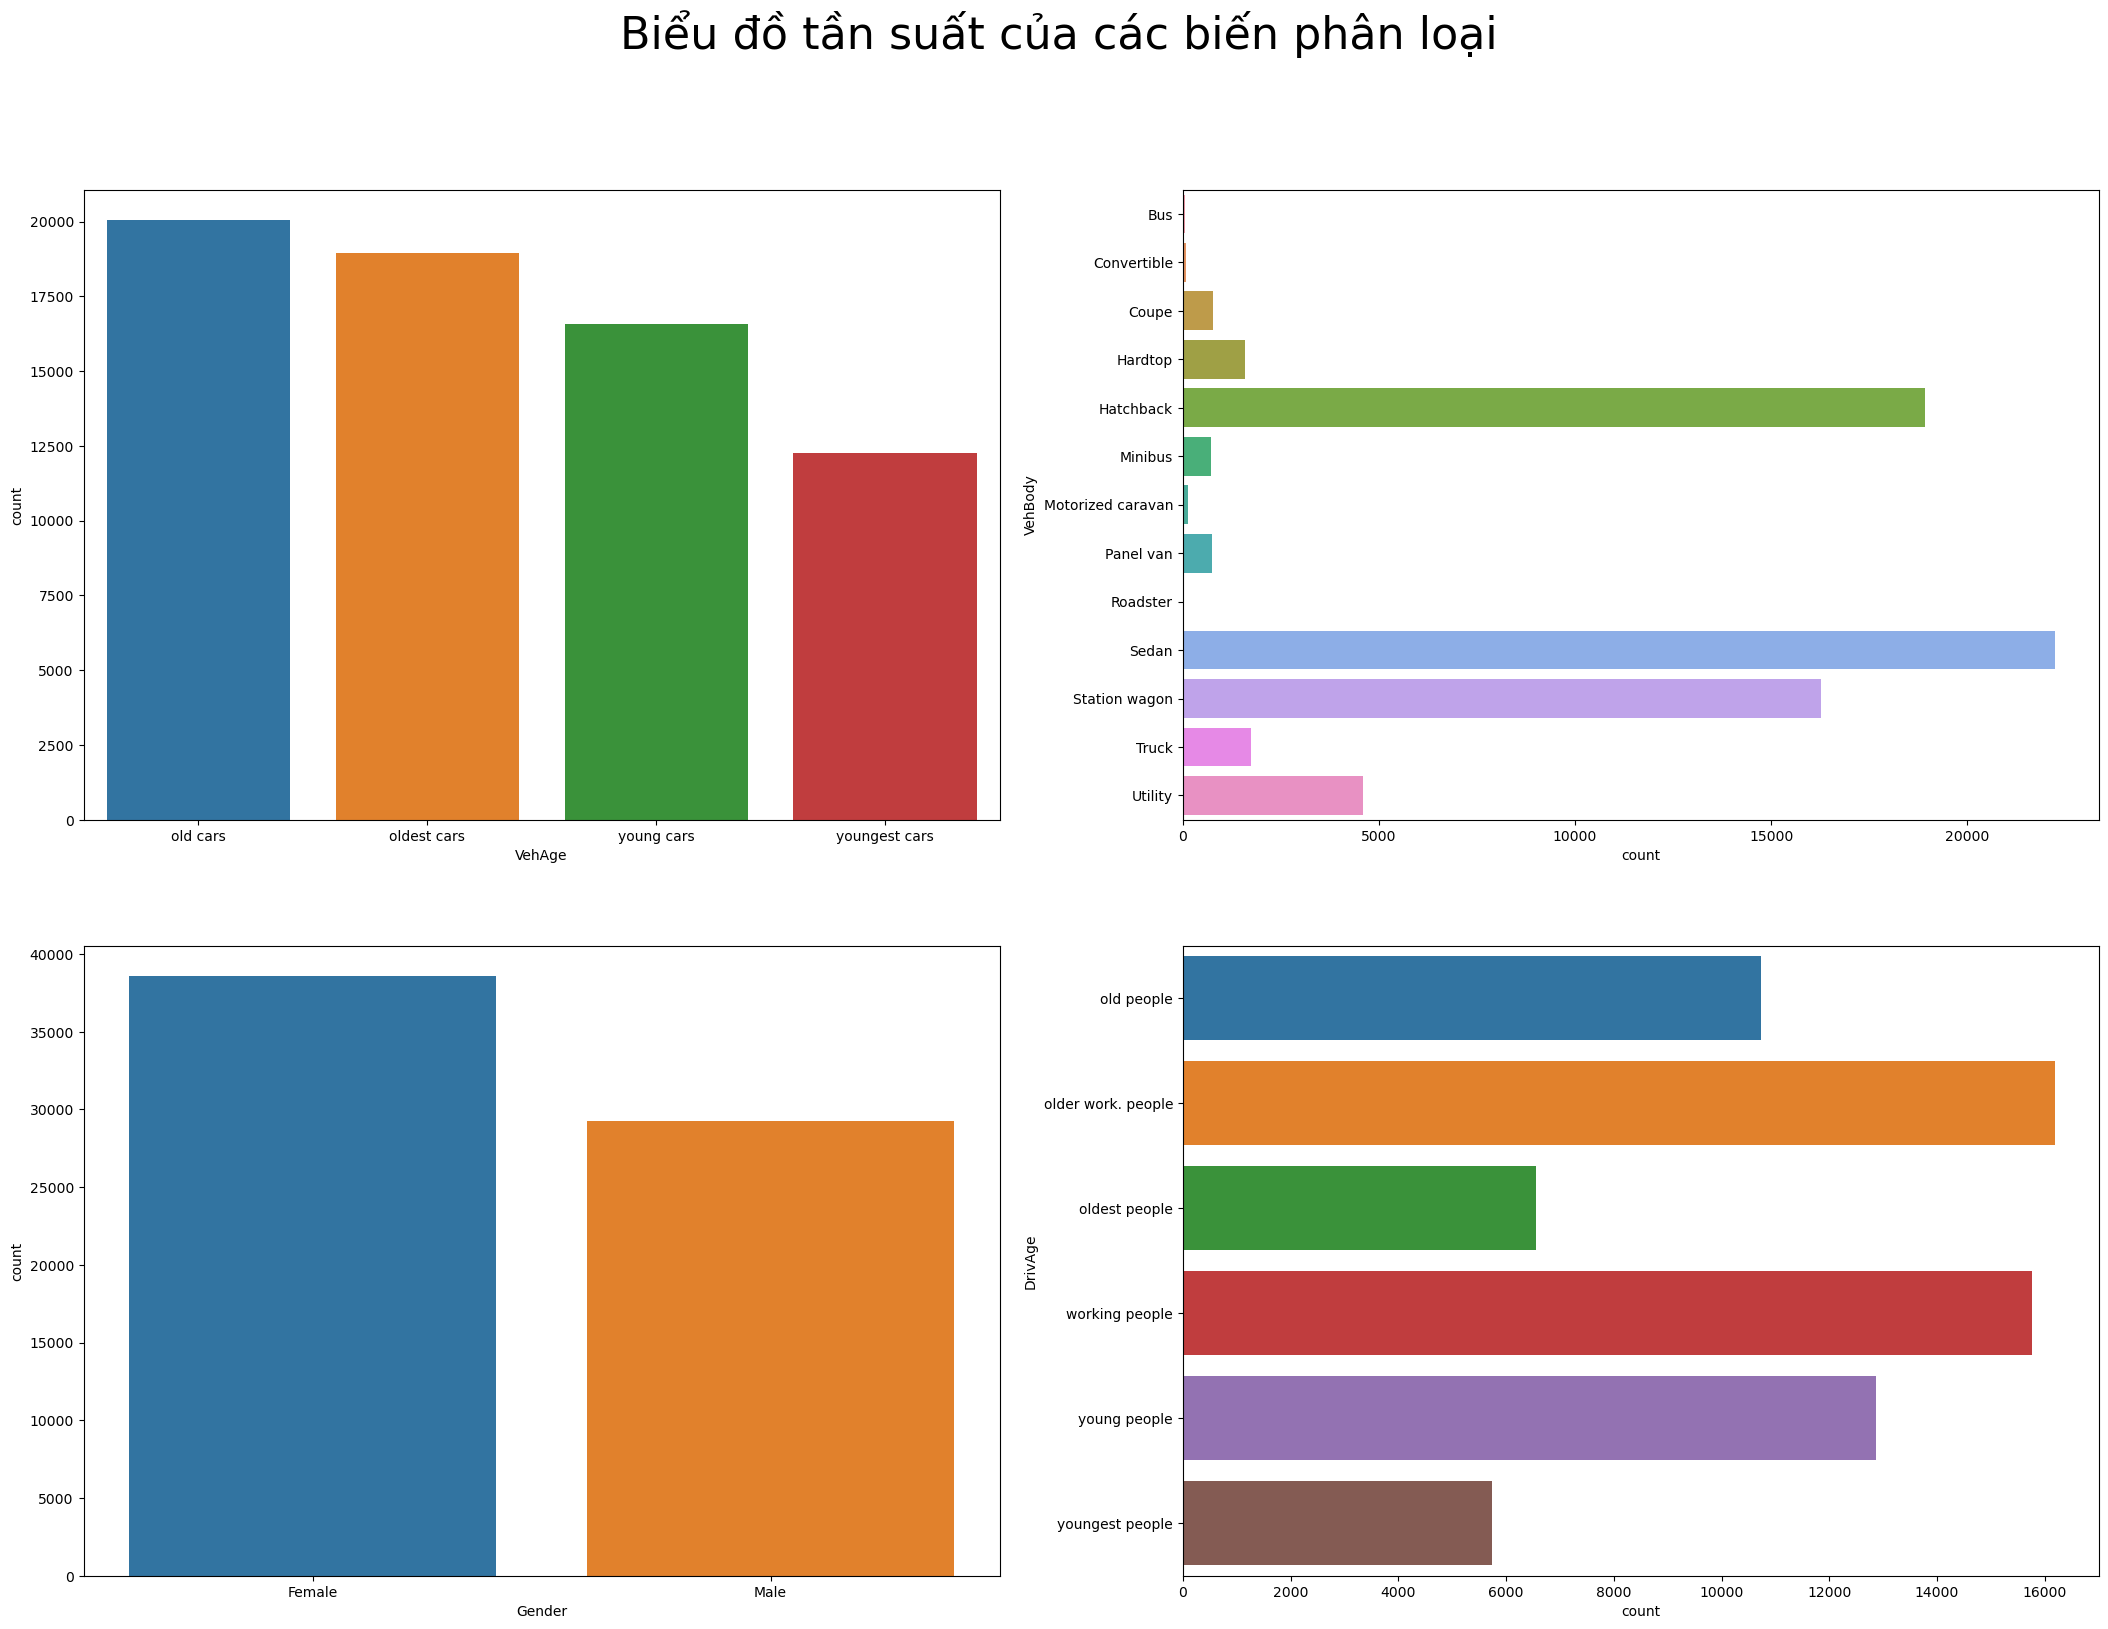

In [9]:
#Tạo lưới biểu đồ
fig, axes = plt.subplots(2,2, figsize=(26,18))
fig.suptitle('Biểu đồ tần suất của các biến phân loại', fontsize=32)

#Vẽ biểu đồ tần suất của cột VehAge
VehAge_freq = sns.countplot(data=ausprivauto0405_data, x='VehAge', ax=axes[0,0])

#Vẽ biểu đồ tần suất của vột VehBody
VehBody_freq = sns.countplot(data=ausprivauto0405_data, y='VehBody', ax=axes[0,1], orient='h')

#Vẽ biểu đồ tần suất của cột Gender
Gender_freq = sns.countplot(data=ausprivauto0405_data, x='Gender', ax=axes[1,0])

#Vẽ biểu đồ tần suất của cột DrivAge
DrivAge_freq = sns.countplot(data=ausprivauto0405_data, y='DrivAge', ax=axes[1,1], orient ='h')

#### Có thể thấy:
Về độ tuổi của xe, "old cars" và "oldest cars" chiếm tỉ lệ cao hơn, chứng tỏ phần lớn xe tham gia bảo hiểm là xe cũ.   
Về loại xe, có ba loại xe chiếm tỉ lệ cao hơn cả là "Hatchback", "Sedan" và "Station wagon", trong đó "Sedan" chiếm tỉ lệ cao nhất.  
Về giới tính của lái xe, số tài xế nữ chiếm tỉ lệ cao hơn số tài xế nam.  
Về độ tuổi của tài xế, có thể thấy phần lớn rơi vào nhóm người đang đi làm ("working people và "older work. people")

#### Đối với các biến liên tục, ta chỉ xét các hợp đồng xảy ra bồi thường để giảm bớt các điểm dữ liệu không quan trọng.

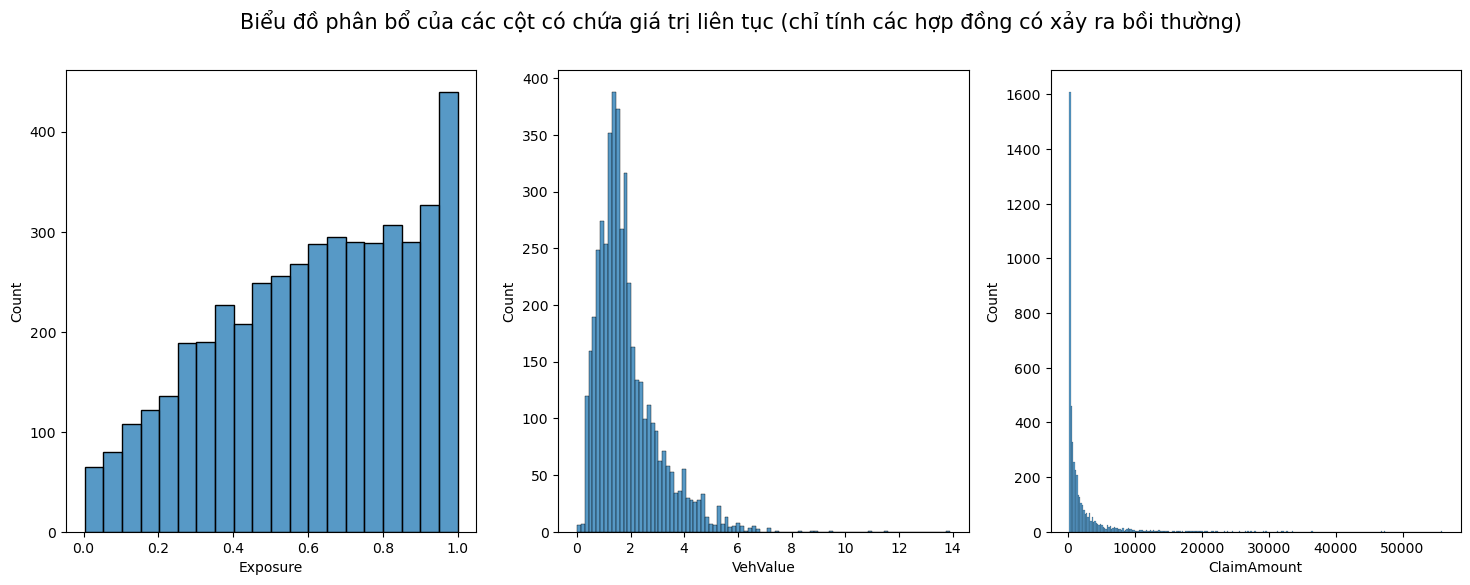

In [26]:
#Tạo lưới biểu đồ
general_distributions, axes = plt.subplots(1,3, figsize=(18,6))
general_distributions.suptitle('Biểu đồ phân bổ của các cột có chứa giá trị liên tục (chỉ tính các hợp đồng có xảy ra bồi thường)',
                              fontsize=15)
#Vẽ biểu đồ phân bổ của Exposure đối với các hợp đồng đã xảy ra bồi thường
Exposure_dist = sns.histplot(data=ausprivauto0405_data_claimocced, x='Exposure', ax=axes[0])

#Vẽ biểu đồ phân bổ của VehValue đối với các hợp đồng đã xảy ra bồi thường
VehValue_dist = sns.histplot(data=ausprivauto0405_data_claimocced, x='VehValue', ax=axes[1])

#Vẽ biểu đồ phân bổ của ClaimAmount đối với các hợp đồng đã xảy ra bồi thường
ClaimAmount_dist = sns.histplot(data=ausprivauto0405_data_claimocced, x='ClaimAmount', ax=axes[2])

#### Có thể thấy:  
  
`-` Thời hạn hợp đồng càng lâu thì khả năng xảy ra yêu cầu bồi thường càng cao, tăng mạnh vào thời điểm cuối thời hạn hợp đồng.  
`-` Phần lớn các xe xảy ra yêu cầu bồi thường có giá trị khoảng 2000 AUD.  
`-` Đối với số tiền bồi thường, do phân bổ của độ lệch quá lớn, ta cần xem xét kỹ hơn.  

In [50]:
#Chia số tiền bồi thường thành các khoảng
ClaimAmount_cut = pd.cut(ausprivauto0405_data_claimocced['ClaimAmount'], 100)
#Xem khoảng nào phổ biến nhất
ClaimAmount_cut.value_counts().to_frame(name="Số yêu cầu bồi thường")

,Số yêu cầu bồi thường
"(144.278, 757.221]",2305
"(757.221, 1314.443]",650
"(1314.443, 1871.664]",398
"(1871.664, 2428.885]",250
"(2428.885, 2986.106]",177
...,...
"(39762.712, 40319.934]",0
"(40319.934, 40877.155]",0
"(40877.155, 41434.376]",0
"(41434.376, 41991.597]",0


#### Có thể thấy:  

Số tiền bồi thường nhiều nhất rơi vào khoảng từ 144.278 AUD đến 757.221 AUD với 2305 yêu cầu bồi thường, chiếm gần 50% tổng số yêu cầu bồi thường 

### 2.2. Số yêu cầu bồi thường và số tiền bồi thường trung bình

#### 2.2.1. Theo giới tính của người lái

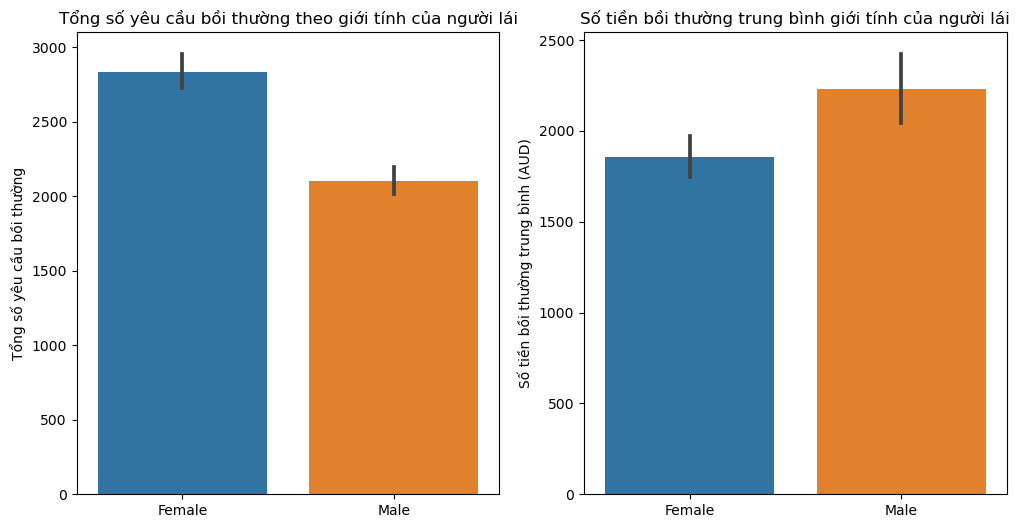

In [54]:
fig, axes =plt.subplots(1,2, figsize=(12,6))
#Vẽ biểu đồ thể hiện tổng số yêu cầu bồi thường theo giới tính của lái xe
VehAge_ClaimNb_plt = sns.barplot(data=ausprivauto0405_data, 
                                 x='Gender', 
                                 y='ClaimNb', 
                                 estimator=sum,
                                 ax=axes[0])
VehAge_ClaimNb_plt.set(title='Tổng số yêu cầu bồi thường theo giới tính của người lái',
                      ylabel='Tổng số yêu cầu bồi thường',
                      xlabel='')
VehAge_ClaimNb_plt.ticklabel_format(style='plain', axis='y')
#Vẽ biểu đồ thể hiện số tiền bồi thường trung bình theo giới tính của lái xe
VehAge_ClaimAmount_plt = sns.barplot(data=ausprivauto0405_data_claimocced, 
                                     x='Gender', 
                                     y='ClaimAmount',
                                     ax=axes[1])
VehAge_ClaimAmount_plt.set(title='Số tiền bồi thường trung bình giới tính của người lái',
        ylabel='Số tiền bồi thường trung bình (AUD)',
        xlabel='')
VehAge_ClaimAmount_plt.ticklabel_format(style='plain', axis='y')

#### Có thể thấy

Lái xe là nữ có tổng số yêu cầu bồi thường cao hơn nhưng lại có số tiền bồi thường trung bình thấp hơn lái xe là nam

#### 2.2.2. Theo nhóm tuổi của xe

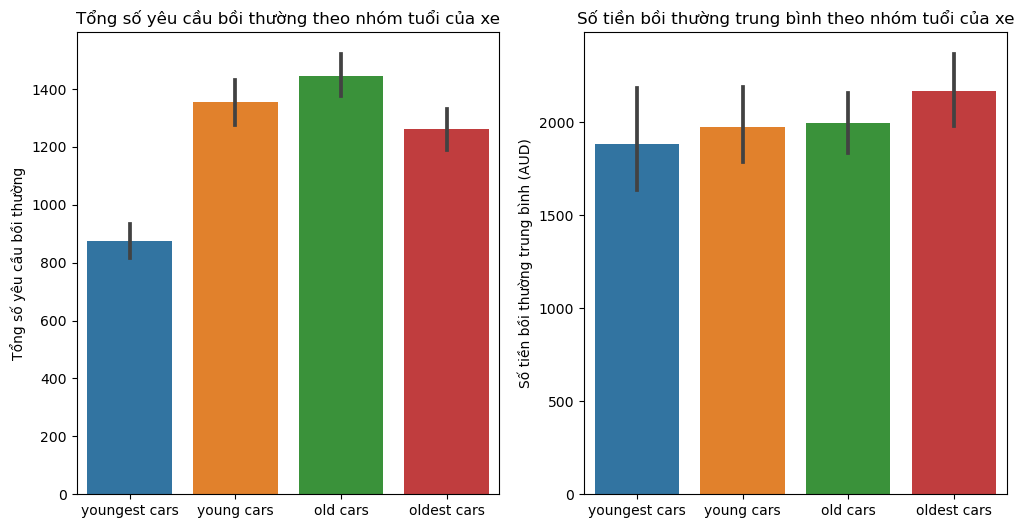

In [12]:
fig, axes =plt.subplots(1,2, figsize=(12,6))
#Vẽ biểu đồ thể hiện tổng số yêu cầu bồi thường theo nhóm tuổi của xe
VehAge_ClaimNb_plt = sns.barplot(data=ausprivauto0405_data, 
                                 x='VehAge', 
                                 y='ClaimNb', 
                                 estimator=sum,
                                 order=['youngest cars', 'young cars', 'old cars', 'oldest cars']
                                , ax=axes[0])
VehAge_ClaimNb_plt.set(title='Tổng số yêu cầu bồi thường theo nhóm tuổi của xe',
                      ylabel='Tổng số yêu cầu bồi thường',
                      xlabel='')
VehAge_ClaimNb_plt.ticklabel_format(style='plain', axis='y')
#Vẽ biểu đồ thể hiện số tiền bồi thường trung bình theo nhóm tuổi của xe
VehAge_ClaimAmount_plt = sns.barplot(data=ausprivauto0405_data_claimocced, 
                                     x='VehAge', 
                                     y='ClaimAmount',
                                     order=['youngest cars', 'young cars', 'old cars', 'oldest cars']
                                    , ax=axes[1])
VehAge_ClaimAmount_plt.set(title='Số tiền bồi thường trung bình theo nhóm tuổi của xe',
        ylabel='Số tiền bồi thường trung bình (AUD)',
        xlabel='')
VehAge_ClaimAmount_plt.ticklabel_format(style='plain', axis='y')

#### Có thể thấy:

Nhóm xe mới nhất ("youngest cars") có tổng số yêu cầu bồi thường và số tiền bồi thường trung bình thấp nhất.  
Nhóm xe cũ nhất ("oldest cars") có tổng số yêu cầu bồi thường thấp thứ hai nhưng lại có số tiền bồi thường trung bình cao nhất.
Nhóm xe cũ ("old cars") có tổng số yêu cầu bồi thường cao nhất nhưng số tiền bồi thường trung bình của nhóm xe này không quá cao hơn so với nhóm xe mới ("young cars) và nhóm xe mới nhất ("youngest cars").

#### 2.3. Theo nhóm tuổi của tài xế

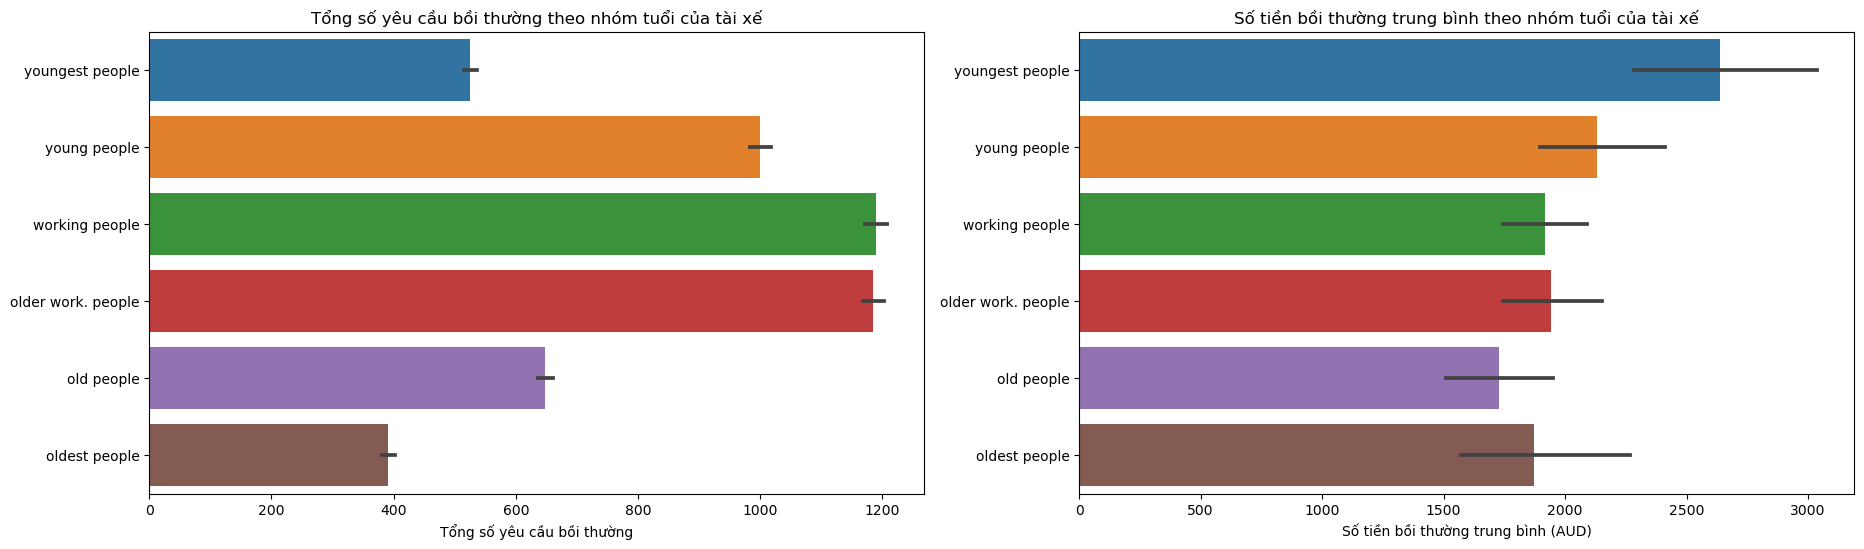

In [13]:
fig, axes =plt.subplots(1,2, figsize=(22,6))

#Vẽ biểu đồ thể hiện tổng số yêu cầu bồi thường theo nhóm tuổi của tài xế
DrivAge_ClaimNb_plt = sns.barplot(data=ausprivauto0405_data_claimocced, 
                                  y='DrivAge', 
                                  x='ClaimNb', 
                                  orient='h', 
                                  estimator=sum,
                                  order=['youngest people', 'young people', 'working people', 
                                             'older work. people', 'old people', 'oldest people'],
                                 ax=axes[0])
DrivAge_ClaimNb_plt.set(title='Tổng số yêu cầu bồi thường theo nhóm tuổi của tài xế', 
                            xlabel='Tổng số yêu cầu bồi thường',
                            ylabel='')
DrivAge_ClaimNb_plt.ticklabel_format(style='plain', axis='x')

#Vẽ biểu đồ thể hiện số tiền bồi thường trung bình theo nhóm tuổi của tài xế
DrivAge_ClaimAmount_plt = sns.barplot(data=ausprivauto0405_data_claimocced, 
                                      y='DrivAge', 
                                      x='ClaimAmount', 
                                      orient='h',
                                      order=['youngest people', 'young people', 'working people', 
                                             'older work. people', 'old people', 'oldest people'],
                                     ax=axes[1])
DrivAge_ClaimAmount_plt.set(title='Số tiền bồi thường trung bình theo nhóm tuổi của tài xế',
                            xlabel='Số tiền bồi thường trung bình (AUD)',
                            ylabel='')
DrivAge_ClaimAmount_plt.ticklabel_format(style='plain', axis='x')

#### Có thể thấy

Nhóm người trẻ nhất tuy có tổng số yêu cầu bồi thường khá thấp (xếp thứ 5 trên 6) nhưng lại có số tiền bồi thường trung bình cao nhất trong các nhóm tuổi. 
Nhóm người đi làm có tổng số yêu cầu bồi thường xấp xỉ nhau và cao hơn hẳn các nhóm tuổi khác, nhưng lại có số tiền bồi thường trung bình không quá cao.  
Nhóm người già nhất có tổng số tiền bồi thường thấp nhất trong tất cả các nhóm tuổi.


### 2.3. Tỉ lệ xảy ra bồi thường

Đối với bộ dữ liệu này, tỉ lệ bồi thường được tính bằng:
$$
Số tiền bồi thường = \frac{Số hợp đồng xảy ra bồi thường}{Tổng số hợp đồng} * 100
$$

#### 2.3.1. Theo giới tính

        Tỉ lệ bồi thường
Gender                  
Female          7.336217
Male            7.195843


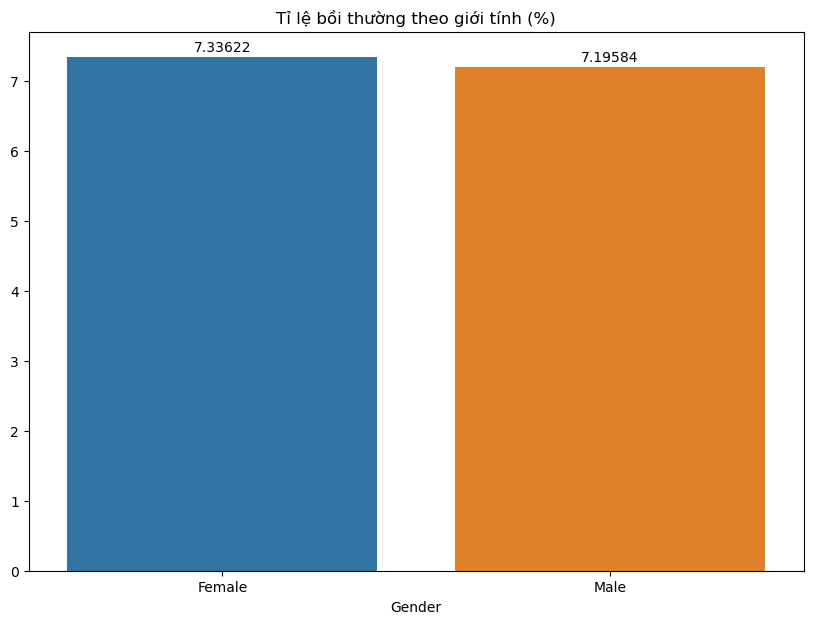

In [61]:
#Tính toán tỉ lệ bồi thường theo giới tính
grouped_by_gender_count = ausprivauto0405_data.groupby('Gender').count()
grouped_by_gender_sum = ausprivauto0405_data.groupby('Gender').sum()
gender_claim_rate = grouped_by_gender_sum['ClaimNb']*100/grouped_by_gender_count['ClaimNb']

#Vẽ biểu đồ tỉ lệ bồi thường theo giới tính
fig, ax = plt.subplots(figsize=(10,7))
gender_claim_rate_plot = sns.barplot(x= gender_claim_rate.index, 
                                     y= gender_claim_rate.values,
                                     ax=ax)
gender_claim_rate_plot.set(title='Tỉ lệ bồi thường theo giới tính (%)')
print(gender_claim_rate.to_frame().rename(columns={"ClaimNb": "Tỉ lệ bồi thường"}))
for i in gender_claim_rate_plot.containers:
    gender_claim_rate_plot.bar_label(i, padding=2)

#### Có thể thấy:

Tỉ lệ bồi thường của cả hai giới tính đều rơi vào khoảng 7%.

#### 2.3.2. Theo nhóm tuổi của xe

               ClaimPct
VehAge                 
old cars       7.206938
oldest cars    6.655056
young cars     8.163019
youngest cars  7.146936


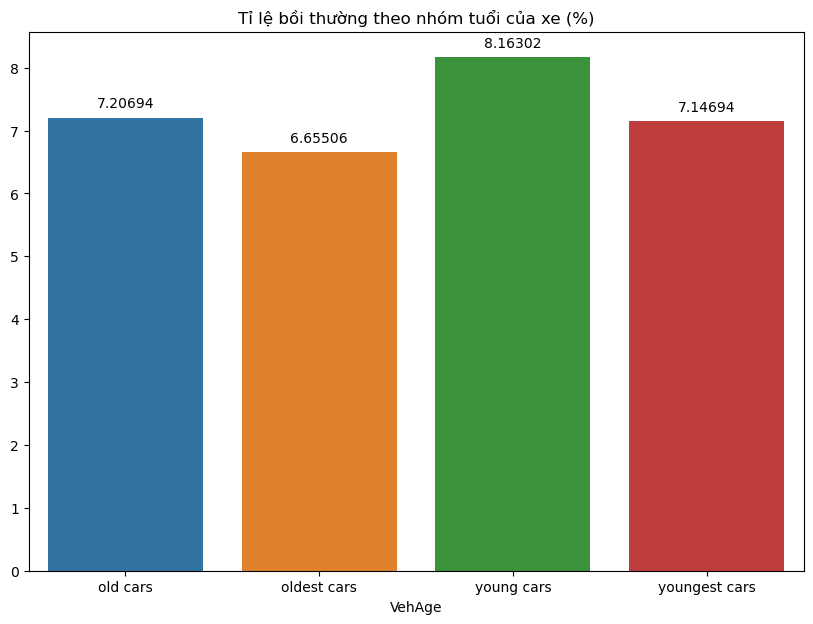

In [62]:
#Tính toán tỉ lệ bồi thường theo nhóm tuổi của xe
grouped_by_VehAge_count = ausprivauto0405_data.groupby('VehAge').count()
grouped_by_VehAge_sum = ausprivauto0405_data.groupby('VehAge').sum()
VehAge_claim_rate = grouped_by_VehAge_sum['ClaimNb']*100/grouped_by_VehAge_count['ClaimNb']

#Vẽ biểu đồ tỉ lệ bồi thường theo nhóm tuổi của xe
fig, ax = plt.subplots(figsize=(10,7))
VehAge_claim_rate_plot = sns.barplot(x= VehAge_claim_rate.index,
                                     y= VehAge_claim_rate.values,
                                     ax=ax)
VehAge_claim_rate_plot.set(title='Tỉ lệ bồi thường theo nhóm tuổi của xe (%)')
print(VehAge_claim_rate.to_frame().rename(columns={"ClaimNb": "ClaimPct"}))
for i in VehAge_claim_rate_plot.containers:
    VehAge_claim_rate_plot.bar_label(i, padding=5)

#### Có thể thấy:

Tỉ lệ bồi thường của nhóm xe mới là cao nhất, khoảng 8.16%.  
Tỉ lệ bồi thường của nhóm xe cũ là thấp nhất, khoảng 6.65%.

#### 2.3.3. Theo nhóm tuổi của tài xế

                    ClaimPct
DrivAge                     
old people          6.035768
older work. people  7.319785
oldest people       5.956927
working people      7.541067
young people        7.766990
youngest people     9.143156


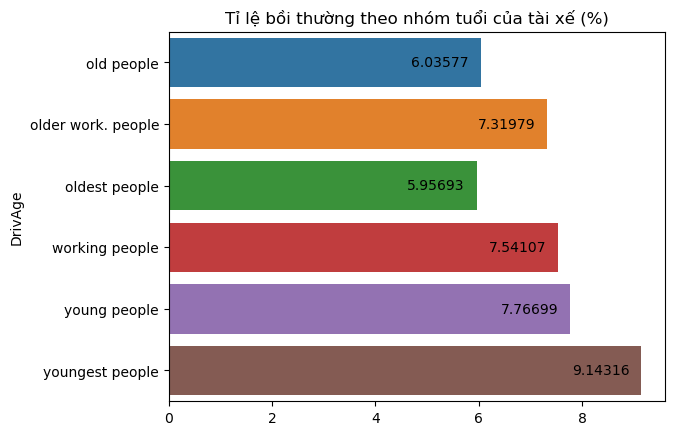

In [68]:
#Tính toán tỉ lệ bồi thường theo nhóm tuổi của tài xế
grouped_by_DrivAge_count = ausprivauto0405_data.groupby('DrivAge').count()
grouped_by_DrivAge_sum = ausprivauto0405_data.groupby('DrivAge').sum()
DrivAge_claim_rate = grouped_by_DrivAge_sum['ClaimNb']*100/grouped_by_DrivAge_count['ClaimNb']

#Vẽ biểu đồ tỉ lệ bồi thường theo nhóm tuổi của tài xế
DrivAge_claim_rate_plot = sns.barplot(y= DrivAge_claim_rate.index, x= DrivAge_claim_rate.values, orient='h')
DrivAge_claim_rate_plot.set(title='Tỉ lệ bồi thường theo nhóm tuổi của tài xế (%)')
print(DrivAge_claim_rate.to_frame().rename(columns={"ClaimNb": "ClaimPct"}))
for i in DrivAge_claim_rate_plot.containers:
    DrivAge_claim_rate_plot.bar_label(i, padding=-50)

#### Có thể thấy:

Tỉ lệ bồi thường của xe có vẻ như là tỉ lệ nghịch với độ tuổi của tài xế:  
Nhóm người trẻ nhất ("youngest people") có tỉ lệ bồi thường cao nhất là 9.14%, còn nhóm người già nhất ("oldest people") có tỉ lệ bồi thường thấp nhất là 5.96%.  
Chúng ta sẽ kiểm định giả thuyết này ở phần sau.

#### 2.3.4. Tỉ lệ bồi thường theo loại xe

                    ClaimPct
VehBody                     
Bus                20.833333
Convertible         3.703704
Coupe               9.615385
Hardtop             8.613046
Hatchback           7.031457
Minibus             6.276151
Motorized caravan  11.811024
Panel van           9.042553
Roadster           11.111111
Sedan               7.187514
Station wagon       7.674805
Truck               7.428571
Utility             6.018317


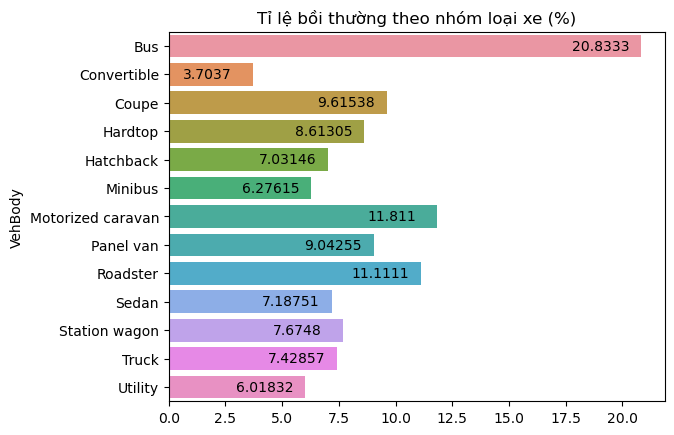

In [67]:
#Tính toán tỉ lệ bồi thường theo loại xe
grouped_by_VehBody_count = ausprivauto0405_data.groupby('VehBody').count()
grouped_by_VehBody_sum = ausprivauto0405_data.groupby('VehBody').sum()
VehBody_claim_rate = grouped_by_VehBody_sum['ClaimNb']*100/grouped_by_VehBody_count['ClaimNb']

#Vẽ biểu đồ tỉ lệ bồi thường theo loại xe
VehBody_claim_rate_plot = sns.barplot(y= VehBody_claim_rate.index, x= VehBody_claim_rate.values, orient='h')
VehBody_claim_rate_plot.set(title='Tỉ lệ bồi thường theo nhóm loại xe (%)')
print(VehBody_claim_rate.to_frame().rename(columns={"ClaimNb": "ClaimPct"}))
for i in VehBody_claim_rate_plot.containers:
    VehBody_claim_rate_plot.bar_label(i, padding=-50)

#### Có thể thấy:

Xe bus có tỉ lệ bồi thường cao hơn rất nhiều so với các loại xe khác, lên đến 20.83%.  
Xe Convertible có tỉ lệ bồi thường thấp nhất, chỉ có 3.7%.

In [14]:
#Chuyển các giá trị ở cột VehAge và DrivAge thành dạng số tương ứng
cats_to_numeric_data = ausprivauto0405_data.copy()
cats_to_numeric_dict = {
    'youngest people':1, 
    'young people':2, 
    'working people':3, 
    'older work. people':4, 
    'old people':5, 
    'oldest people': 6,
    'youngest cars':1,
    'young cars':2,
    'old cars':3,
    'oldest cars':4}
cats_to_numeric_data.replace(cats_to_numeric_dict, inplace=True)
columns = ['VehAge', 'DrivAge']
cats_to_numeric_data['VehAge']=pd.to_numeric(cats_to_numeric_data['VehAge'])
cats_to_numeric_data['DrivAge']=pd.to_numeric(cats_to_numeric_data['DrivAge'])
cats_to_numeric_data.dtypes

Exposure        float64
VehValue        float64
VehAge            int64
VehBody        category
Gender         category
DrivAge           int64
ClaimOcc          int32
ClaimNb           int32
ClaimAmount     float64
dtype: object

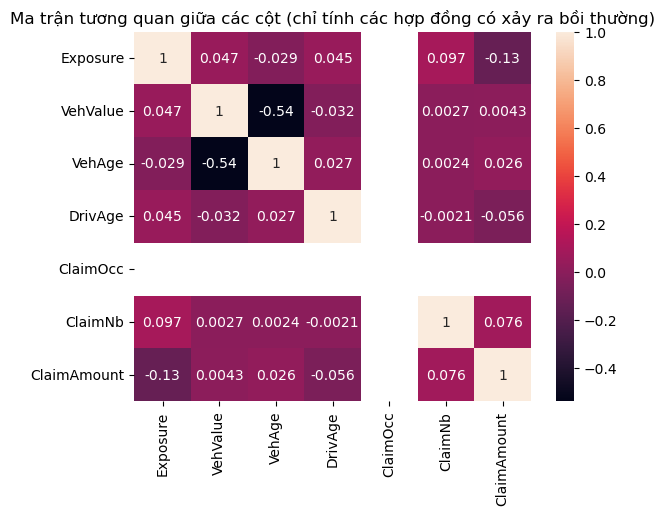

In [16]:
#Lọc các hợp đồng có yêu cầu bồi thường
cats_to_numeric_data_claimocced=cats_to_numeric_data[cats_to_numeric_data['ClaimOcc']!=0]
#Vẽ biểu đồ thể hiện sự tương quan giữa các cột 
corr =  cats_to_numeric_data_claimocced.corr()
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0)
plt.title('Ma trận tương quan giữa các cột (chỉ tính các hợp đồng có xảy ra bồi thường)')
plt.show()

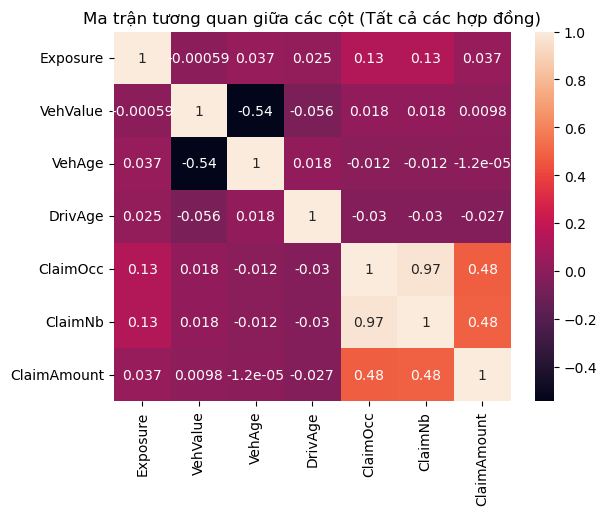

In [15]:
#Vẽ biểu đồ thể hiện sự tương quan giữa các cột 
corr = cats_to_numeric_data.corr()
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0)
plt.title('Ma trận tương quan giữa các cột (Tất cả các hợp đồng)')
plt.show()